<a href="https://colab.research.google.com/github/andrea-dai/unsupervised_machine_leanining_Clustering-Songs/blob/main/unsuperviser_machine_leaning_clustering_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Get the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/file/d/1XBRkzfg9MKNOgmbroBHN0U3oQ-U6ZRtW/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
columns_new = ['name','artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
'type','duration_ms','time_signature','id','html']
df.columns = columns_new

df.index = df.set_index(["name","artist"]).index
   
df = df.drop(columns = ['type','id','html','name','artist'])
df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4


# **2. Intentional the Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
my_min_max = MinMaxScaler(feature_range=(0,1))
 
my_min_max.fit(df)
 
scaled_df = my_min_max.transform(df)
 
df_scaled = pd.DataFrame(scaled_df,
             index=df.index,
             columns=df.columns)
df_scaled.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8


# **3. Figure out the best K value**

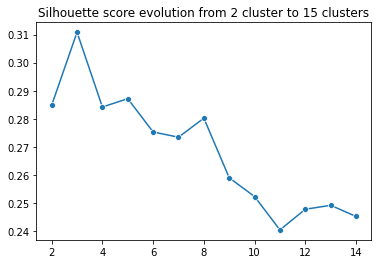

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#silhouette_score(df_scaled, myKMeans.labels_)

max_k = 15
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(df_scaled).labels_
    sil_score.append(silhouette_score(df_scaled, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()
#From the figure, I will set the k value to 3

# **4. Got the Clusters**

In [ ]:
 
myKMeans = KMeans(n_clusters = 3)
 
myKMeans.fit(df_scaled) 
 
clusters = myKMeans.predict(df_scaled) 

df_scaled['clusters'] = clusters
df_scaled.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,2
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,1
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,1
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,0
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,0


In [ ]:
centroids = myKMeans.cluster_centers_
df_centro = pd.DataFrame(centroids)
df_centro.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.367773,0.149312,0.462905,0.649962,6.862069e-01,0.049576,0.925646,0.621471,0.149851,0.209477,0.497283,0.073312,0.740920
1,0.541395,0.757730,0.438948,0.859015,1.000000e+00,0.096466,0.165276,0.193752,0.193869,0.500738,0.566568,0.053056,0.789017
2,0.588970,0.747609,0.554148,0.864385,9.547918e-15,0.102880,0.163840,0.181887,0.197984,0.494167,0.565723,0.054549,0.787587


In [ ]:
columns = df.columns
#print(columns)
df_centro.columns = columns
df_centro.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.367773,0.149312,0.462905,0.649962,6.862069e-01,0.049576,0.925646,0.621471,0.149851,0.209477,0.497283,0.073312,0.740920
1,0.541395,0.757730,0.438948,0.859015,1.000000e+00,0.096466,0.165276,0.193752,0.193869,0.500738,0.566568,0.053056,0.789017
2,0.588970,0.747609,0.554148,0.864385,9.547918e-15,0.102880,0.163840,0.181887,0.197984,0.494167,0.565723,0.054549,0.787587


# **5. Plotting**

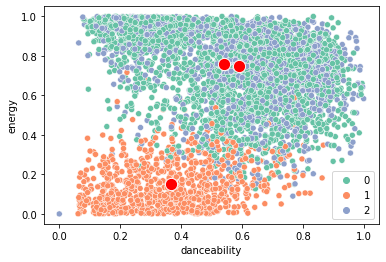

In [ ]:
sns.scatterplot(data=df_scaled, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=df_centro, x='danceability', y='energy', color='red', s=150)
plt.show()

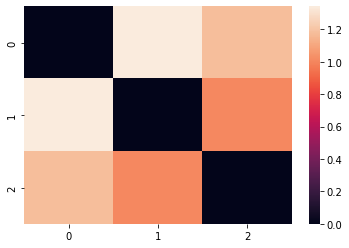

In [ ]:
from sklearn.metrics import pairwise_distances
dist = pd.DataFrame(pairwise_distances(df_centro), index=df_centro.index, columns=df_centro.index)
sns.heatmap(dist)
plt.show()

# **The heatmap showing us that: **
Cluster 1 and 0 are much similar

Cluster 2 is much unique with other two 


# **7. Using PCA to reduce the featers**






[26.05786145 14.62710224  8.99042875  7.6027881   7.40734785  6.98101559
  6.64698856  6.52914253  6.36816122  3.95619404  2.29760671  1.82528929
  0.71007367]


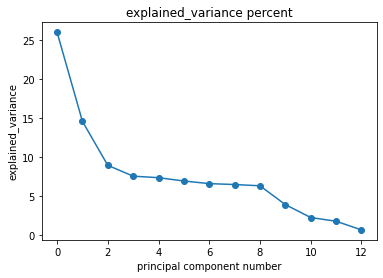

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()# scale the original data with 'standardscale'
scaled_data = scaler.fit_transform(df)

pca = PCA()
transaction_feature = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

n=[0,1,2,3,4,5,6,7,8,9,10,11,12]

plt.title('explained_variance percent')
plt.xlabel('principal component number')
plt.ylabel('explained_variance')

plt.plot(n, explained_variance*100, marker='o')
plt.show()
#In general, it is a good rule of thumb to preserve around 80% of the variance.
#we set component number to 7

In [ ]:
pca = PCA(n_components = 7)

reduced_feature = pca.fit_transform(scaled_data)

reduced_features = pd.DataFrame(reduced_feature)#(transform from numpy to dataframe)

reduced_features.head()


,0,1,2,3,4,5,6
0,0.538288,-0.610676,2.630660,1.842911,4.891142,0.782407,-0.079453
1,-0.244578,-1.845867,-1.215774,-0.194418,-0.224803,0.212527,0.070213
2,-1.630503,-1.286562,-0.579951,1.233892,-0.543715,-2.458654,1.316092
3,1.550708,-2.486887,-0.455573,0.806557,1.726814,0.059158,-0.179194
4,2.060739,-2.287592,-0.247060,-0.060003,0.072382,0.518668,-0.194716


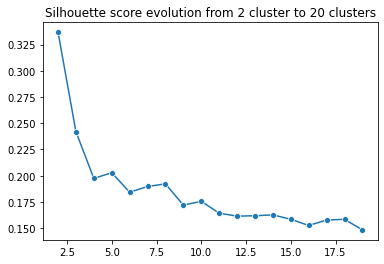

In [ ]:
from sklearn.metrics import silhouette_score
reduced_features

max_k = 20
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(reduced_features).labels_
    sil_score.append(silhouette_score(reduced_features, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

In [ ]:
 
myKMeans = KMeans(n_clusters = 7)
 
myKMeans.fit(reduced_features) 
 
clusters = myKMeans.predict(reduced_features) 

reduced_features['cluster'] = clusters
df_scaled['cluster'] = clusters


#columns_new = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','cluster']
columns_new = ['PC1','PC2','cluster']

#reduced_features.columns = columns_new
reduced_features.head(5)
#df['cluster'] = clusters
#df.head()
df_scaled.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters,cluster
name,artist,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,2,0
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,1,1
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,1,2
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,0,1
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,0,1


In [ ]:
centroids = myKMeans.cluster_centers_
df_centro = pd.DataFrame(centroids)
df_centro.head()

,0,1,2,3,4,5,6
0,-1.016739,0.409480,0.373968,1.042847,2.520007,0.311136,0.041098
1,0.796024,-1.418418,-0.072929,-0.058697,0.062756,0.146480,-0.126543
2,-1.337233,-0.465382,1.073421,-0.127671,-0.362558,-0.150171,0.509794
3,3.886027,-0.438274,0.128781,-0.273905,0.144768,-0.284542,-0.079903
4,-1.168401,-0.587378,-0.793936,-0.035494,-0.119008,0.121253,-0.176711


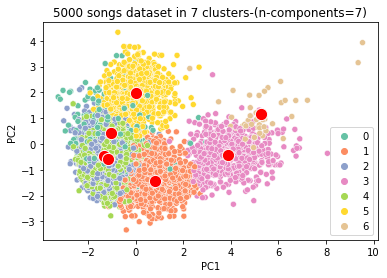

In [ ]:
sns.scatterplot(data = reduced_features, x=0, y=1, hue='cluster', palette='Set2')
sns.scatterplot(data=df_centro, x=0, y=1, color='red', s=150)

plt.title('5000 songs dataset in 7 clusters-(n-components=7)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# **8. Analysing the Results**

# **Interpreting the Meaning of the Clusters**


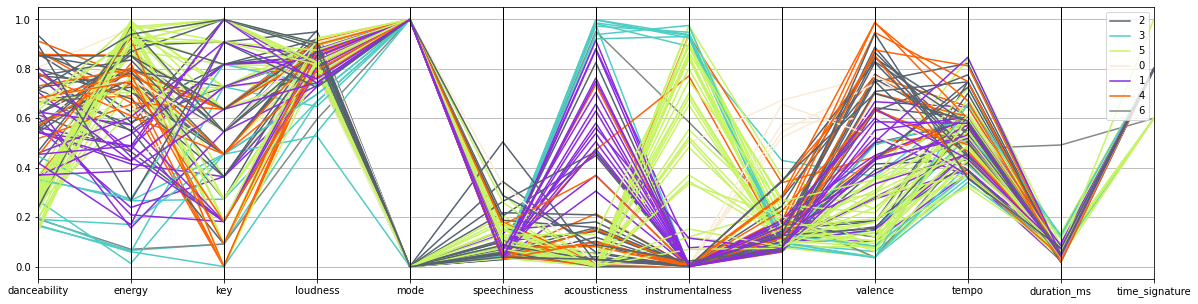

In [ ]:
from random import sample
df_scaled = df_scaled.drop(columns=['clusters'])

plt.figure(figsize = (20,5))
pd.plotting.parallel_coordinates(df_scaled.sample(100),'cluster',color=('#556270', '#4ECDC4', '#C7F464','#FAEBD7','#8A2BE2','#FF6103','#808A87'))

In [ ]:
df['cluster'] = clusters
x=df.groupby('cluster').mean()
x_new=x.T
x_new.head()


cluster,0,1,2,3,4,5,6
danceability,0.559081,0.572138,0.685711,0.308512,0.645074,0.274315,0.193167
energy,0.747395,0.381168,0.741821,0.118739,0.749398,0.907289,0.144010
key,6.025890,5.307263,6.451354,5.232633,4.140959,5.349539,3.934783
loudness,-7.087337,-11.711912,-5.853369,-22.070813,-6.284721,-7.803084,-21.450239
mode,0.634304,0.722067,0.085256,0.631664,0.983764,0.694887,0.695652


In [ ]:
x=df_scaled.groupby('cluster').mean()
#x=x.drop(columns = ['clusters'])
x_new=x.T #(thansfer the columns to rows)
x_new.head()

cluster,0,1,2,3,4,5,6
danceability,0.578160,0.591663,0.709112,0.319040,0.667088,0.283676,0.199759
energy,0.747395,0.381168,0.741821,0.118739,0.749398,0.907289,0.144010
key,0.547808,0.482478,0.586487,0.475694,0.376451,0.486322,0.357708
loudness,0.862585,0.787195,0.882701,0.618323,0.875669,0.850916,0.628440
mode,0.634304,0.722067,0.085256,0.631664,0.983764,0.694887,0.695652


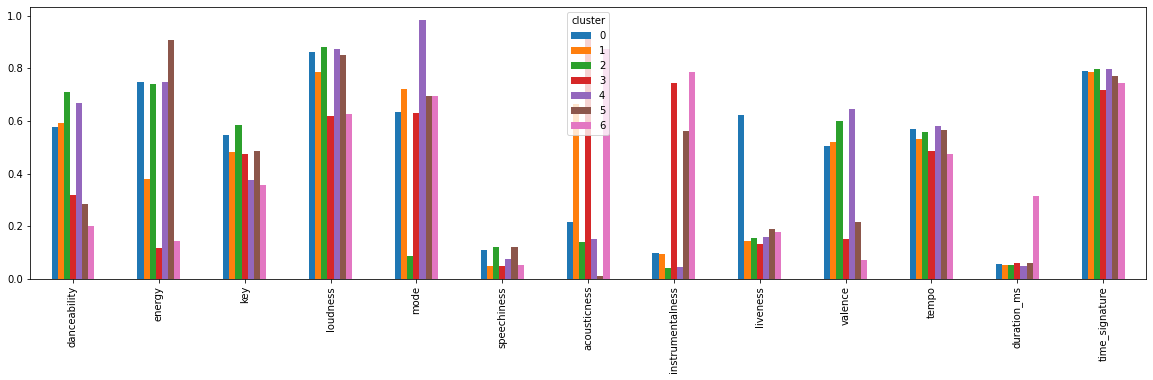

In [ ]:
x_new.plot.bar(figsize = (20,5))


In [ ]:
#df_scaled = df_scaled.drop(columns=['clusters'])
x=df_scaled.groupby('cluster').mean()
x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.578160,0.747395,0.547808,0.862585,0.634304,0.108983,0.216699,0.098138,0.623986,0.506949,0.570091,0.055686,0.788997
1,0.591663,0.381168,0.482478,0.787195,0.722067,0.050274,0.665188,0.095017,0.143621,0.522200,0.533272,0.053688,0.787709
2,0.709112,0.741821,0.586487,0.882701,0.085256,0.123091,0.141957,0.040765,0.155330,0.600944,0.559086,0.051376,0.799599
3,0.319040,0.118739,0.475694,0.618323,0.631664,0.048702,0.939232,0.744162,0.134291,0.152309,0.486315,0.062371,0.718255
4,0.667088,0.749398,0.376451,0.875669,0.983764,0.077214,0.152238,0.043820,0.159475,0.644458,0.582012,0.048516,0.799262


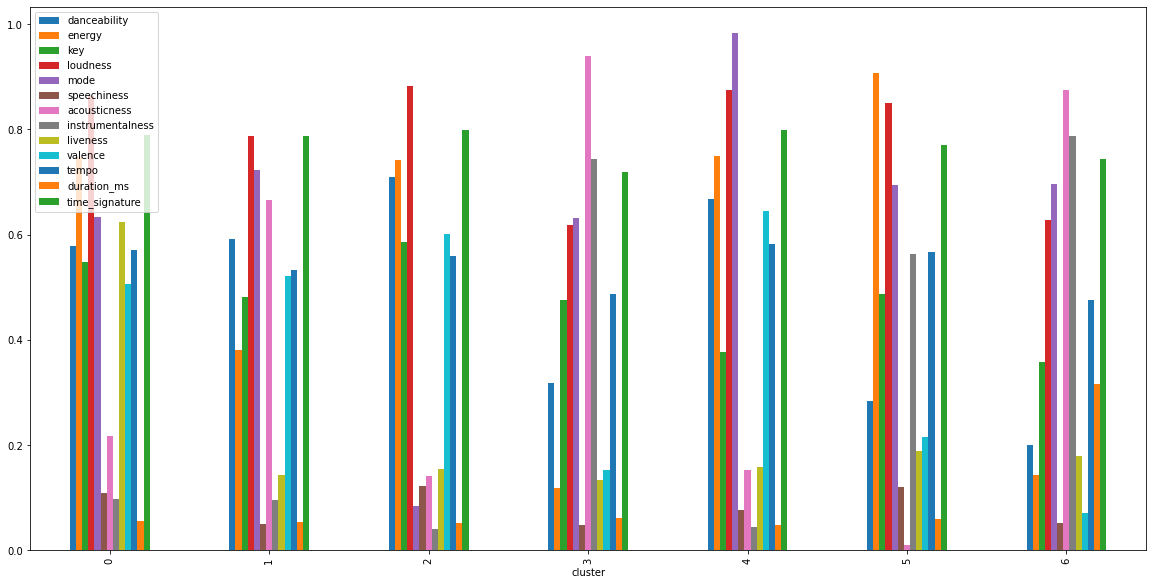

In [ ]:
x.plot.bar(figsize=(20,10))
